# Oseen Wake

This notebook deals with the Oseen wake that is responsible for the lifting force and back flipping of air bubbles. The flow field can be expressed in spherical coordinates as follows:

$$
\frac{u_r}{U} = -\frac{a^3 \cos \theta}{2r^3} + \frac{3a^2}{2r^2 Re} \left\{ 1 - \exp\left[ -\frac{rRe}{2a} (1 + \cos\theta) \right] \right\} \\- \frac{3a(1-\cos\theta)}{4r} \exp\left[ -\frac{rRe}{2a} (1 + \cos\theta) \right] 
$$

$$
\frac{u_\theta}{U} = -\frac{a^3\sin\theta}{4r^3} - \frac{3a\sin\theta}{4r}\exp\left[ -\frac{rRe}{2a} (1+\cos\theta) \right]
$$

$$
\frac{u_\varphi}{U} = 0
$$

Since the bubble simulation is formulated in Cartesian coordinates, we convert the above to $u_x$, $u_y$ and $u_z$ using:

$$
u_x = u_r \sin\theta\cos\phi + u_\theta \cos\theta\cos\phi - u_\phi\sin\phi
$$

$$
u_y = u_r \sin\theta\sin\phi + u_\theta \cos\theta\sin\phi + u_\phi\cos\phi
$$

$$
u_z = u_r \cos\theta - u_\theta\sin\theta
$$

where 

$$
\sin\theta = \frac{\sqrt{x^2 + y^2}}{r}
$$

$$
\cos\theta = \frac{z}{r}
$$

$$
\sin\phi = \frac{y}{\sqrt{x^2 + y^2}}
$$

$$
\cos\phi = \frac{x}{\sqrt{x^2 + y^2}}
$$

and 

$$
r = \sqrt{x^2 + y^2 + z^2}
$$

## 0 Packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Velocity field

In spherical coordinate systems, the far-field flow is radial

$$
u_r = \frac{3aU}{2r},
$$

we can plot this in a plane:

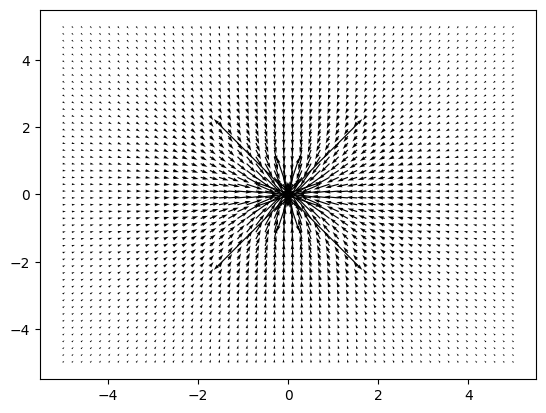

In [6]:
lim = 5
x = np.linspace(-lim, lim)
y = np.linspace(-lim, lim)
X, Y = np.meshgrid(x, y)
r = (X**2 + Y**2)**0.5
a = 1
U = 1
r_hat = np.stack([X, Y])
r_hat /= np.linalg.norm(r_hat, axis=0)

ur = -3 * a * U / 2 / r
plt.quiver(X, Y, ur*r_hat[0], ur*r_hat[1])

For each combination of $\theta$ and $\phi$, I can get a unit normal defined by 

$$
\hat n = (\cos\phi\sin\theta, \sin\phi\sin\theta, \cos\theta)
$$

In [24]:
theta = np.linspace(0, np.pi)
phi = np.linspace(0, 2*np.pi)

THETA, PHI = np.meshgrid(theta, phi)

THETA = THETA.flatten()
PHI = PHI.flatten()

n = np.stack([np.cos(PHI)*np.sin(THETA), np.sin(PHI)*np.sin(THETA), np.cos(THETA)], axis=-1)

In [75]:
import pyvista as pv
pv.set_jupyter_backend("html")

In [26]:
pl = pv.Plotter()
grid = pv.PolyData(n)
grid["vectors"] = n
grid["theta"] = THETA
pl.add_mesh(grid)
glyphs = grid.glyph(orient="vectors", scale="theta")
pl.add_mesh(glyphs)
pl.show()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [454]:
U = 1.0e-4
mu = 1.0e-3
rho = 1.0e3
a = .3
Re = rho * a * U / mu

In [ ]:
lim = 2
res = 20
x = np.linspace(-lim, lim, res)
y = np.linspace(-lim, lim, res)
z = np.linspace(-lim, lim, res)
x, y, z = np.meshgrid(x, y, z)

x = x.flatten()
y = y.flatten()
z = z.flatten()

points = 

In [456]:
r = x**2 + y**2 + z**2
sint = (x**2 + y**2)**0.5 / r
cost = z / r
sinp = y / (x**2 + y**2)**0.5
cosp = x / (x**2 + y**2)**0.5

In [457]:
x_uni = np.unique(x)

In [458]:
x_uni

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

In [459]:
valid_ind = r > a
valid_ind *= np.isclose(x, x_uni[len(x_uni)//2])

In [460]:
u_r = U * ( 
    - a**3 * cost / 2 / r**3 
    + 3 * a**2 / 2 * r**2 * Re * (
        1 - np.exp(- r * Re / 2 / a * (1 + cost))
    )
    - 3 * a * (1 - cost) / 4 / r * np.exp(- r * Re / 2 / a * (1 + cost))
)
u_t = U * (
    - a**3 * sint / 4 / r**3 
    - 3 * a * sint / 4 / r * np.exp(- r * Re / 2 / a * (1 + cost))
)
u_p = 0

In [461]:
u_x = u_r * sint * cosp + u_t * cost * cosp - u_p * sinp
u_y = u_r * sint * sinp + u_t * cost * sinp + u_p * cosp
u_z = u_r * cost - u_t * sint

In [462]:
for i in [x, y, z, u_x, u_y, u_z]:
    i[~valid_ind] = np.nan

In [463]:
points = np.stack([x, y, z], axis=-1)
velocity = np.stack([u_x, u_y, u_z], axis=-1)
ones = np.ones(velocity.shape[0])

In [464]:
velocity.shape

(8000, 3)

In [466]:
points

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [465]:
pl = pv.Plotter()
grid = pv.PolyData(points)
grid["v"] = velocity
grid["v_mag"] = np.linalg.norm(velocity, axis=1)
grid["ones"] = ones
pl.add_mesh(grid)
glyphs = grid.glyph(orient="v", scale="ones", factor=.2)
pl.add_mesh(glyphs)
pl.show_axes()
pl.camera_position = "yz" 
pl.show()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [467]:
class OseenWake:
    """Compute the flow field in a Oseen wake. The flow field is characterized by two regions: a Stokeslet in the low Reynolds region and a compensating flow """
    def __init__(self, U, a, rho=1e3, mu=1e-3):
        self.U = U # upward velocity
        self.a = a # bubble radius
        self.rho = rho # density
        self.mu = mu # viscosity

    def flow(self, points):
        """Compute Oseen wake at given points. 

        Args:
        points -- should be an array of (npts, 3).

        Returns: 
        flow -- the flow velocity at each given point, also (npts, 3).
        """
        U = self.U
        a = self.a
        rho = self.rho
        mu = self.mu
        Re = rho * a * U / mu

        x, y, z = points[:, 0], points[:, 1], points[:, 2]
        r = x**2 + y**2 + z**2
        sint = (x**2 + y**2)**0.5 / r
        cost = z / r
        sinp = y / (x**2 + y**2)**0.5
        cosp = x / (x**2 + y**2)**0.5

        u_r = U * ( 
            - a**3 * cost / 2 / r**3 
            + 3 * a**2 / 2 * r**2 * Re * (
                1 - np.exp(- r * Re / 2 / a * (1 + cost))
            )
            - 3 * a * (1 - cost) / 4 / r * np.exp(- r * Re / 2 / a * (1 + cost))
        )
        u_t = U * (
            - a**3 * sint / 4 / r**3 
            - 3 * a * sint / 4 / r * np.exp(- r * Re / 2 / a * (1 + cost))
        )
        u_p = 0

        u_x = u_r * sint * cosp + u_t * cost * cosp - u_p * sinp
        u_y = u_r * sint * sinp + u_t * cost * sinp + u_p * cosp
        u_z = u_r * cost - u_t * sint

        return np.stack([u_x, u_y, u_z], axis=-1)

In [468]:
U = 1.0e-4
a = 1e-3
oseen = OseenWake(U, a)

In [472]:
x = np.array([.1, .1, .1]).reshape((1, 3))
oseen.flow(x)

array([[-4.33928125e-08, -4.33928125e-08,  1.12757984e-07]])